## 🔹 Neural Network Loss Functions
### 1. Mean Squared Error (MSE)

**Used for regression.**

**Formula:**  
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

**Gradient:**  
If $\hat{y}_i = f(x_i, \theta)$ is the prediction,  
$$
\frac{\partial \text{MSE}}{\partial \theta} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i) \cdot \frac{\partial \hat{y}_i}{\partial \theta}
$$

**Example:**  
Given one sample $(x = 1, y = 3)$, suppose:
- Model: $\hat{y} = \theta x$
- Current $\theta = 0.5$

Then:
- $\hat{y} = 0.5 \cdot 1 = 0.5$
- MSE = $(3 - 0.5)^2 = 6.25$
- Gradient = $-2 \cdot (3 - 0.5) \cdot x = -5.0$

---

### 2. Cross-Entropy Loss (Binary Classification)

**Formula:**  
$$
\text{CE}(y, \hat{y}) = - \left[y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})\right]
$$

**Gradient for logistic sigmoid output:**  
$$
\frac{\partial \text{CE}}{\partial z} = \hat{y} - y
$$  
where $z$ is the logit and $\hat{y} = \sigma(z)$.

**Example:**  
- True label: $y = 1$, logit: $z = 0$, so $\hat{y} = 0.5$
- Loss: $-\log(0.5) = 0.693$
- Gradient: $\hat{y} - y = 0.5 - 1 = -0.5$

---

## 🔹 Optimizers: Step-by-Step Examples

### 1. SGD (Stochastic Gradient Descent)

**Update Rule:**  
$$
\theta := \theta - \eta \cdot \nabla_\theta J(\theta)
$$

**Example:**  
Let’s continue MSE with:
- $\theta = 0.5$
- Gradient = $-5.0$
- Learning rate $\eta = 0.1$

Update:  
$$
\theta := 0.5 - 0.1 \cdot (-5.0) = 1.0
$$

---

### 2. Adam Optimizer

Adam uses moving averages of gradients and squared gradients.

**Steps:**
1. $m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$
2. $v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$
3. Bias correction:
   $$
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}
   $$
4. Update:
   $$
   \theta := \theta - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
   $$

**Example:**  
Assume:
- $g_t = -5$, $\eta = 0.1$
- $\beta_1 = 0.9$, $\beta_2 = 0.999$, $\epsilon = 10^{-8}$
- $m_0 = 0$, $v_0 = 0$

Then:
- $m_1 = -0.5$, $v_1 = 0.025$
- $\hat{m}_1 = -5$, $\hat{v}_1 = 25$
- Update:
  $$
  \theta := \theta - \frac{0.1}{\sqrt{25} + 10^{-8}} \cdot (-5) = \theta + 0.1
  $$


# ⚙️ Optimizer Concepts: Detailed Mathematical Breakdown

This section explains the mathematics behind key gradient-based optimizers: **SGD (with all variants)**, **Momentum**, and **NAG**, including symbolic examples and convergence behaviors.

---

## 1. 🚶 Gradient Descent (GD) and Its Variants

### 🔹 1.1 Full-Batch Gradient Descent

**Idea**: Use the **entire dataset** to compute the gradient of the loss function.

**Update Rule**:
$$
\theta_{t+1} = \theta_t - \eta \cdot \frac{1}{n} \sum_{i=1}^{n} \nabla_\theta J(\theta_t; x_i, y_i)
$$

- Pros: Smooth convergence
- Cons: Slow for large datasets, memory intensive

---

### 🔹 1.2 Stochastic Gradient Descent (SGD)

**Idea**: Use **a single training example** at each step.

**Update Rule**:
$$
\theta_{t+1} = \theta_t - \eta \cdot \nabla_\theta J(\theta_t; x_i, y_i)
$$

- Pros: Fast, can escape local minima
- Cons: Noisy updates → zigzag path

---

### 🔹 1.3 Mini-Batch Gradient Descent

**Idea**: Use a **subset of training data (mini-batch)** to estimate the gradient.

**Update Rule**:
$$
\theta_{t+1} = \theta_t - \eta \cdot \frac{1}{m} \sum_{j=1}^{m} \nabla_\theta J(\theta_t; x_j, y_j)
$$

Where $m$ is the batch size.

- Pros: Combines efficiency and stability
- Most commonly used in practice

### 🧾 Symbolic Example (SGD)

Let’s minimize:
$$
J(\theta) = (y - x \theta)^2
$$

Gradient:
$$
\frac{dJ}{d\theta} = -2x(y - x\theta)
$$

Let $x = 2$, $y = 8$, $\theta_0 = 0$, $\eta = 0.1$

- Step 1:
  - Gradient: $-2 \cdot 2 \cdot (8 - 0) = -32$
  - Update: $\theta_1 = 0 + 3.2 = 3.2$

---

## 2. 🏃 Gradient Descent with Momentum

### 🧠 Intuition:
Adds **inertia** to updates: build velocity from previous gradients to help move through valleys and damp oscillations.

### 🔢 Update Rule:

1. Velocity:
   $$
   v_t = \gamma v_{t-1} + \eta \cdot \nabla_\theta J(\theta_t)
   $$
2. Parameter update:
   $$
   \theta_{t+1} = \theta_t - v_t
   $$

Where:
- $\gamma \in [0, 1)$ is the momentum coefficient (e.g., 0.9)


### 🧾 Symbolic Example

Same as above: $x = 2$, $y = 8$, $\eta = 0.1$, $\gamma = 0.9$

- Init: $\theta_0 = 0$, $v_0 = 0$
- Step 1:
  - Gradient: $g_1 = -32$
  - $v_1 = 0.1 \cdot (-32) = -3.2$
  - $\theta_1 = 0 + 3.2 = 3.2$
- Step 2:
  - Gradient: $g_2 = -4(8 - 2 \cdot 3.2) = -6.4$
  - $v_2 = 0.9 \cdot (-3.2) + 0.1 \cdot (-6.4) = -3.52$
  - $\theta_2 = 3.2 + 3.52 = 6.72$

---

## 3. 🚀 Nesterov Accelerated Gradient (NAG)

### 🧠 Intuition:
Momentum with **foresight** — it "peeks ahead" at the anticipated position before computing the gradient.

### 🔢 Update Rule:

1. Look-ahead:
   $$
   \tilde{\theta}_t = \theta_t - \gamma v_{t-1}
   $$

2. Gradient at look-ahead:
   $$
   g_t = \nabla_\theta J(\tilde{\theta}_t)
   $$

3. Velocity update:
   $$
   v_t = \gamma v_{t-1} + \eta \cdot g_t
   $$

4. Final update:
   $$
   \theta_{t+1} = \theta_t - v_t
   $$


---

## ✅ Summary: Comparison Table

| Method        | Batch Type      | Look-Ahead? | Gradient Stability | Speed        | Used In |
|---------------|------------------|-------------|---------------------|--------------|---------|
| **Full-Batch**| All data         | ❌           | ✅ Very Stable       | ❌ Slow       | Theory  |
| **SGD**       | Single sample    | ❌           | ❌ Noisy             | ✅ Fast       | Rare    |
| **Mini-Batch**| Partial data     | ❌           | ✅ Moderate          | ✅ Balanced   | ✅ Common |
| **Momentum**  | Any              | ❌           | ✅ Smooth            | ✅ Accelerates| ✅ Deep Learning |
| **NAG**       | Any              | ✅           | ✅ Responsive        | ✅✅ Fast      | ✅ SOTA |



# Python Code 

- **SGD**: 

Takes consistent steps, but may zigzag especially if gradients differ in scale (e.g., axis-aligned ellipses).

- **Adam**:

Adjusts step size per parameter using adaptive learning rates, leading to smoother and often faster convergence.

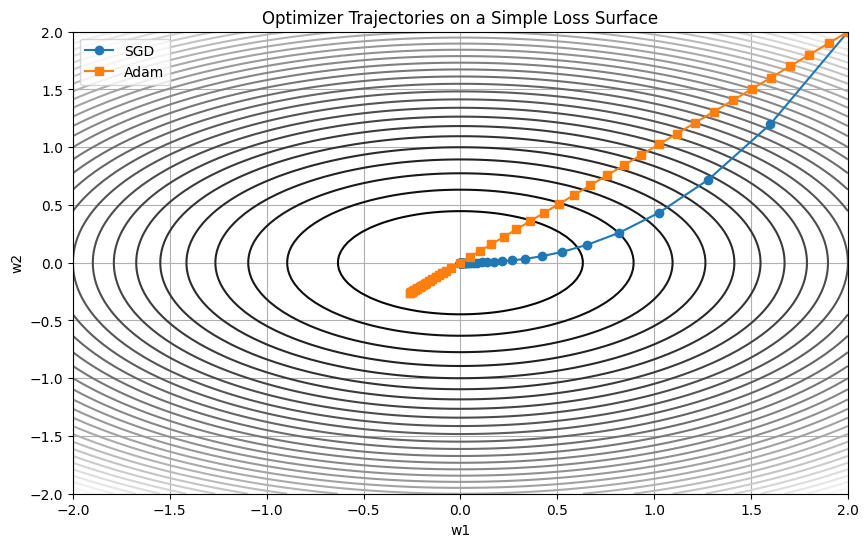

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define a simple 2D quadratic loss surface: f(w1, w2) = w1^2 + 2*w2^2
def loss_function(w):
    return w[0]**2 + 2 * w[1]**2

def grad_loss(w):
    return np.array([2*w[0], 4*w[1]])

# Stochastic Gradient Descent (SGD) optimizer
def sgd(w, grad, lr):
    return w - lr * grad

# Adam optimizer implementation
def adam(w, grad, m, v, t, lr=0.1, beta1=0.9, beta2=0.999, eps=1e-8):
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad ** 2)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    w = w - lr * m_hat / (np.sqrt(v_hat) + eps)
    return w, m, v

# Initialize paths for tracking the optimization steps
w_sgd = np.array([2.0, 2.0])
w_adam = np.array([2.0, 2.0])
sgd_path = [w_sgd.copy()]
adam_path = [w_adam.copy()]
m = np.zeros_like(w_adam)
v = np.zeros_like(w_adam)

# Run 50 steps of optimization for both optimizers
for t in range(1, 51):
    g_sgd = grad_loss(w_sgd)
    g_adam = grad_loss(w_adam)

    w_sgd = sgd(w_sgd, g_sgd, lr=0.1)
    w_adam, m, v = adam(w_adam, g_adam, m, v, t)

    sgd_path.append(w_sgd.copy())
    adam_path.append(w_adam.copy())

sgd_path = np.array(sgd_path)
adam_path = np.array(adam_path)

# Create the contour plot of the loss surface
w1, w2 = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
loss_vals = w1**2 + 2*w2**2

plt.figure(figsize=(10, 6))
plt.contour(w1, w2, loss_vals, levels=30, cmap='gray')
plt.plot(sgd_path[:, 0], sgd_path[:, 1], 'o-', label='SGD')
plt.plot(adam_path[:, 0], adam_path[:, 1], 's-', label='Adam')
plt.title('Optimizer Trajectories on a Simple Loss Surface')
plt.xlabel('w1')
plt.ylabel('w2')
plt.legend()
plt.grid(True)
plt.show()


### 📉 Training Loss Curves for Optimizers

The plot below compares how different optimizers reduce training loss over epochs.

- **SGD**: Steady but slow convergence.
- **RMSProp**: Faster than SGD due to adaptive learning rate per parameter.
- **Adam**: Combines momentum and adaptive scaling for fast and stable convergence.


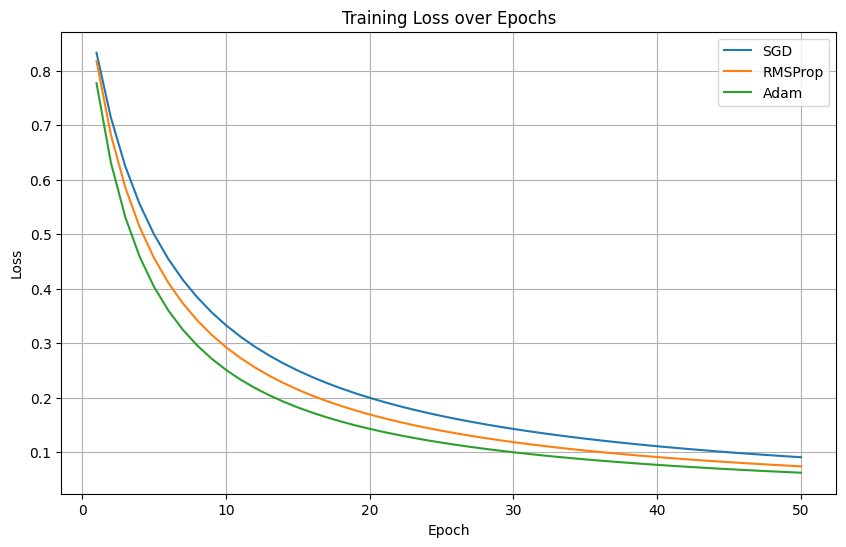

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Simulated training loss over 50 epochs
epochs = np.arange(1, 51)

# Approximate convergence curves
loss_sgd = 1 / (0.2 * epochs + 1)
loss_rmsprop = 1 / (0.25 * epochs + 1) + 0.02 * np.exp(-0.1 * epochs)
loss_adam = 1 / (0.3 * epochs + 1) + 0.01 * np.exp(-0.2 * epochs)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_sgd, label='SGD')
plt.plot(epochs, loss_rmsprop, label='RMSProp')
plt.plot(epochs, loss_adam, label='Adam')
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## 📉 Parameter Trajectory Over Iterations (θ₁ and θ₂)

This section visualizes how each optimizer updates the model parameters θ₁ and θ₂ over time when minimizing a **2D anisotropic quadratic loss**:

### 🔧 Loss Function:
The optimization problem is:
$$
f(\theta) = \theta_1^2 + 5\theta_2^2
$$

The gradient is:
$$
\nabla f(\theta) = [2\theta_1,\ 10\theta_2]
$$

We initialize:
- $\theta = [2.0,\ 2.0]$
- Learning rate $\eta = 0.1$
- Common optimizer settings (e.g., $\gamma = 0.9$, $\beta_1 = 0.9$, $\beta_2 = 0.999$)

---

### 🏃‍♂️ Optimizers Used:
1. **SGD**  
   Vanilla gradient descent without memory.

2. **Momentum**  
   Uses an exponentially decaying moving average of past gradients:
   $$
   v_t = \gamma v_{t-1} + \eta \nabla f(\theta), \quad \theta := \theta - v_t
   $$

3. **NAG (Nesterov Accelerated Gradient)**  
   Computes gradient at the look-ahead position:
   $$
   \tilde{\theta} = \theta - \gamma v_{t-1}, \quad
   v_t = \gamma v_{t-1} + \eta \nabla f(\tilde{\theta}), \quad
   \theta := \theta - v_t
   $$

4. **RMSProp**  
   Uses adaptive learning rate scaled by squared gradient averages:
   $$
   g_t = \nabla f(\theta), \quad
   cache = \beta cache + (1 - \beta) g_t^2, \quad
   \theta := \theta - \frac{\eta}{\sqrt{cache} + \epsilon} g_t
   $$

5. **Adam**  
   Combines momentum and adaptive step sizes:
   $$
   m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
   v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
   \hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad
   \hat{v}_t = \frac{v_t}{1 - \beta_2^t}, \quad
   \theta := \theta - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
   $$

---

### 📊 Plot Description:

The code tracks each parameter separately:
- **Left plot:** θ₁ values over iterations
- **Right plot:** θ₂ values over iterations

This visualizes how each optimizer behaves in directions of **different curvature**:
- θ₁ has mild curvature (scale = 1)
- θ₂ has steep curvature (scale = 10)

---

### 📌 Insights:

- **SGD** converges slowly and suffers from zigzagging.
- **Momentum** and **NAG** accelerate convergence using accumulated gradients.
- **RMSProp** and **Adam** adapt learning rates per parameter, resulting in faster and smoother convergence.

This demonstrates why **adaptive optimizers** are often preferred in deep learning, especially in high-dimensional or ill-conditioned problems.


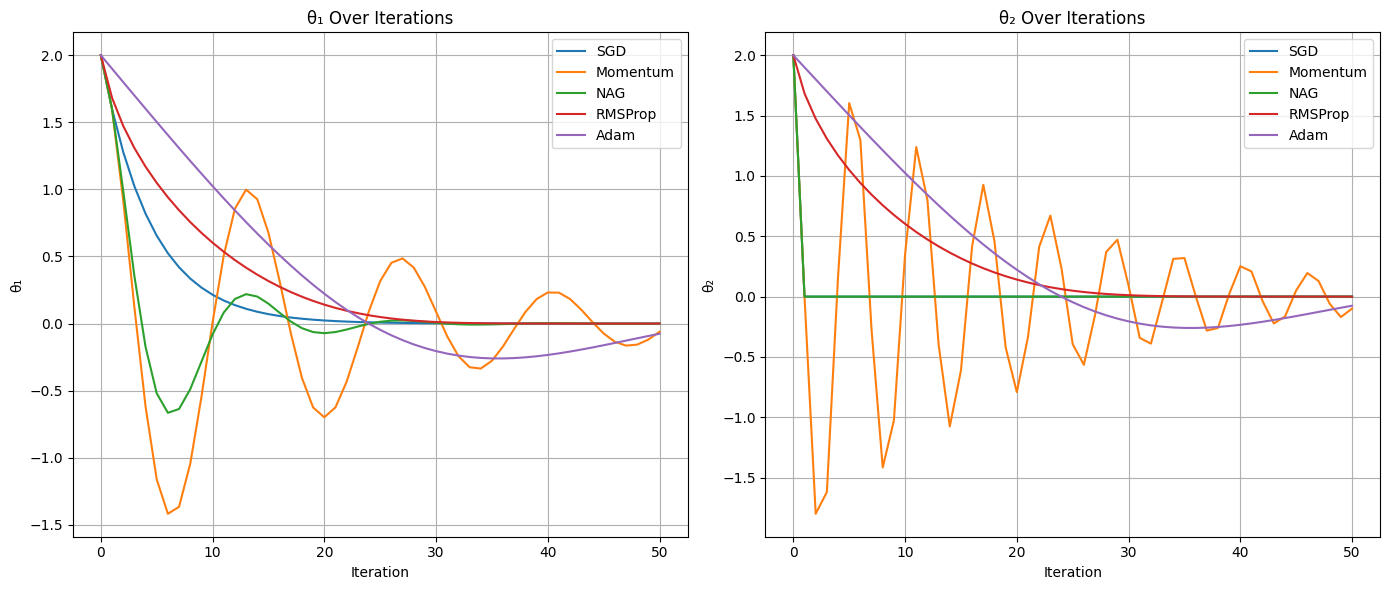

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient of anisotropic quadratic loss: f(w1, w2) = w1^2 + 5*w2^2
def grad(theta):
    return np.array([2 * theta[0], 10 * theta[1]])

# Initialize parameters for all optimizers
theta_sgd = np.array([2.0, 2.0])
theta_momentum = np.array([2.0, 2.0])
theta_nag = np.array([2.0, 2.0])
theta_rms = np.array([2.0, 2.0])
theta_adam = np.array([2.0, 2.0])

# Initialize states
v_momentum = np.zeros(2)
v_nag = np.zeros(2)
cache_rms = np.zeros(2)
m_adam = np.zeros(2)
v_adam = np.zeros(2)

# Hyperparameters
lr = 0.1
gamma = 0.9
beta = 0.9
beta1 = 0.9
beta2 = 0.999
eps = 1e-8
epochs = 50

# Store history of theta values
theta_hist = {
    'SGD': [theta_sgd.copy()],
    'Momentum': [theta_momentum.copy()],
    'NAG': [theta_nag.copy()],
    'RMSProp': [theta_rms.copy()],
    'Adam': [theta_adam.copy()]
}

# Optimization loop
for t in range(1, epochs + 1):
    # SGD
    g_sgd = grad(theta_sgd)
    theta_sgd -= lr * g_sgd
    theta_hist['SGD'].append(theta_sgd.copy())

    # Momentum
    g_mom = grad(theta_momentum)
    v_momentum = gamma * v_momentum + lr * g_mom
    theta_momentum -= v_momentum
    theta_hist['Momentum'].append(theta_momentum.copy())

    # NAG
    lookahead = theta_nag - gamma * v_nag
    g_nag = grad(lookahead)
    v_nag = gamma * v_nag + lr * g_nag
    theta_nag -= v_nag
    theta_hist['NAG'].append(theta_nag.copy())

    # RMSProp
    g_rms = grad(theta_rms)
    cache_rms = beta * cache_rms + (1 - beta) * g_rms**2
    theta_rms -= lr * g_rms / (np.sqrt(cache_rms) + eps)
    theta_hist['RMSProp'].append(theta_rms.copy())

    # Adam
    g_adam = grad(theta_adam)
    m_adam = beta1 * m_adam + (1 - beta1) * g_adam
    v_adam = beta2 * v_adam + (1 - beta2) * g_adam**2
    m_hat = m_adam / (1 - beta1**t)
    v_hat = v_adam / (1 - beta2**t)
    theta_adam -= lr * m_hat / (np.sqrt(v_hat) + eps)
    theta_hist['Adam'].append(theta_adam.copy())

# Convert lists to arrays for plotting
for key in theta_hist:
    theta_hist[key] = np.array(theta_hist[key])

# Plot θ₁ and θ₂ values over iterations
plt.figure(figsize=(14, 6))

# Plot θ₁
plt.subplot(1, 2, 1)
for key in theta_hist:
    plt.plot(theta_hist[key][:, 0], label=key)
plt.title('θ₁ Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('θ₁')
plt.legend()
plt.grid(True)

# Plot θ₂
plt.subplot(1, 2, 2)
for key in theta_hist:
    plt.plot(theta_hist[key][:, 1], label=key)
plt.title('θ₂ Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('θ₂')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
